<a href="https://colab.research.google.com/github/hansonnguy/MAT-421/blob/main/Module_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 4 - Hanson Nguyen

# **19.1 Root Finding Problem Statement**


---

For a function $f(x)$, we might be interested in finding its roots, $r$, where $f(r)=0$. Analytical solutions can be solved for functions like $f(x) = x^2-16$, where $r = 4, -4$. However, for more complicated functions like higher-order functions, the solutions might be more difficult or even require a numerical solution.

In [1]:
import numpy as np
from scipy import optimize

f = lambda x: np.cos(x) - x
r = optimize.fsolve(f, -2)
print("r =", r)

# Verify the solution is a root
result = f(r)
print("result=", result)

r = [0.73908513]
result= [0.]


r_1 = [3.52047363e+83]
r_2 = [8.83517061e+48]


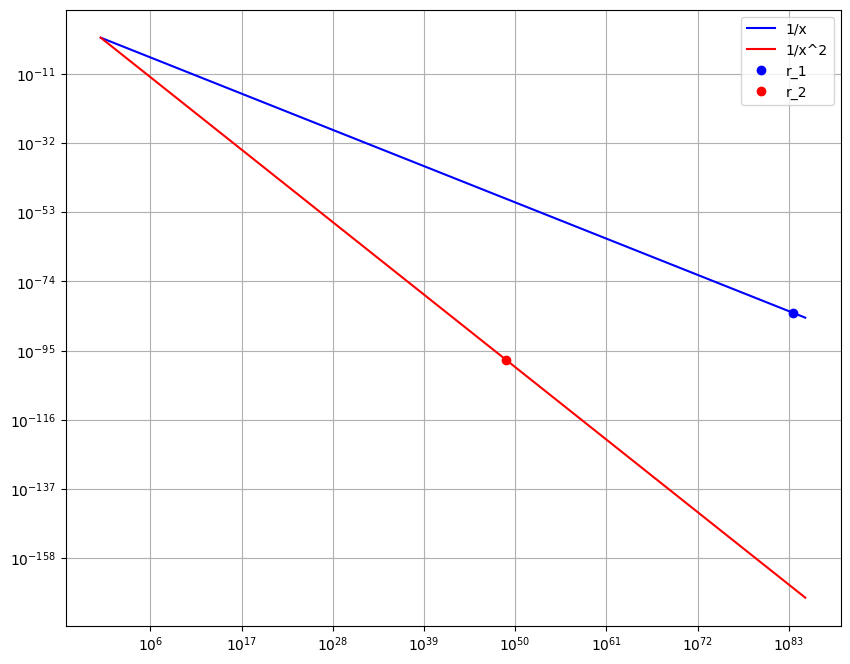

In [14]:
import matplotlib.pyplot as plt

f = lambda x: 1/x
g = lambda x: 1/x**2

r1, infodict1, ier1, mesg1 = optimize.fsolve(f, 2, full_output=True)
r2, infodict2, ier2, mesg2 = optimize.fsolve(g, 2, full_output=True)
print("r_1 =", r1)
print("r_2 =", r2)
fig = plt.figure(figsize = (10,8))

# We can compare the roots of two different functions. Even though 1/x^2 and 1/x do not have roots,
# they are decreasing functions that will reach the tolerance. 1/x^2 should reach the tolerance first as it decrases faster than 1/2

x_new  = np.logspace(0, 85, 100, 10)

plt.plot(x_new, f(x_new), 'b', label = '1/x')
plt.plot(x_new, g(x_new), 'r', label = '1/x^2')
plt.plot(r1, f(r1), 'bo', label = 'r_1')
plt.plot(r2, g(r2), 'ro', label = 'r_2')

# plot on a log scale
plt.xscale('log')
plt.yscale('log')

plt.grid('on')
plt.legend()
plt.show()

# **19.2 Tolerance**


---

Tolerance refers to an error that is acceptable from an engineering perspective. A computer program converges to an acceptable value when it reaches this tolerance. For instance, for $e = |f(x)|$, and $f(x) = x^4/2 + 3x + t/2$, where $e$ is the error and $t$ is the accepted tolerance, $f(0) = t/2$ might be acceptable as a root since $t/2 < t$. With this is mind, the context of the problem must be heavily considered when incorporating tolerances and error definitions.

r_1 = [3.00000002]
r_2 = [8.83517061e+48]
r_3 = [8.83517061e+48]


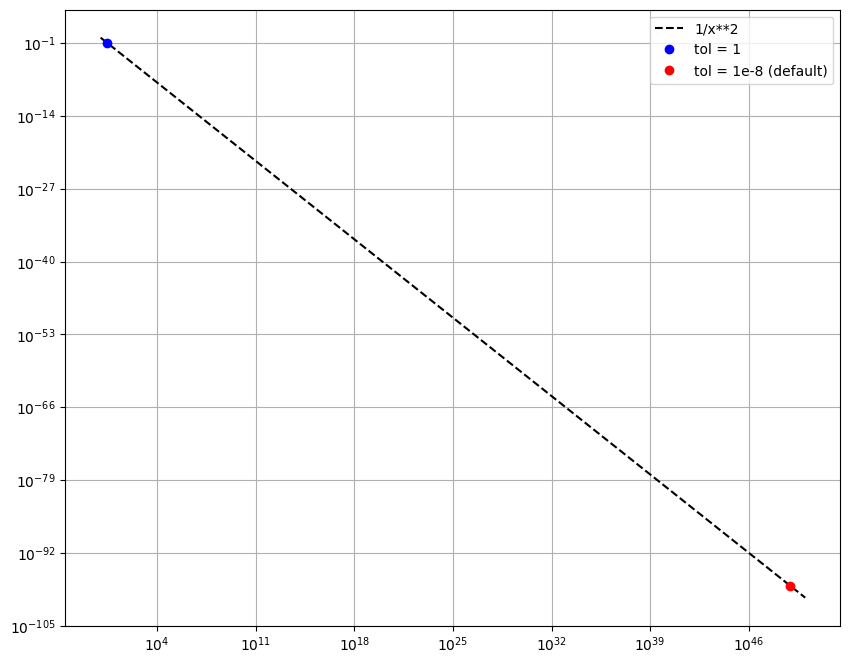

In [112]:
# Same problem before, but with a tolerance much higher (less accurate)
import matplotlib.pyplot as plt

f = lambda x: 1/x**2

r1, infodict1, ier1, mesg1 = optimize.fsolve(f, 2, xtol = 1, full_output=True)
r2, infodict2, ier2, mesg2 = optimize.fsolve(f, 2, full_output=True)

print("r_1 =", r1)
print("r_2 =", r2)
print("r_3 =", r3)
fig = plt.figure(figsize = (10,8))

# We can compare the roots with different tolerances

x_new  = np.logspace(0, 50, 100, 10)

plt.plot(x_new, f(x_new), 'k--', label = '1/x**2')
plt.plot(r1, f(r1), 'bo', label = 'tol = 1')
plt.plot(r2, f(r2), 'ro', label = 'tol = 1e-8 (default)')

# plot on a log scale
plt.xscale('log')
plt.yscale('log')

plt.grid('on')
plt.legend()
plt.show()

# **19.3 Bisection Method**


---

The bisection method is based off of the Intermediate Value Theorem of calculus. That is, for a continuous function $f(x)$, if $\mathrm{sign}(f(a)) \neq \mathrm{sign}(f(b))$, then there is some $c$, where $a < c < b$ such that $f(c) = 0$. Without the loss of generality, we can assume $f(a) > 0$ and $f(b) < 0$. The bisector method chooses the midpoint $m = \frac{a+b}{2}$ and checks if $f(m)=0$, $f(m) > 0$, or $f(m) < 0$. If $f(m)=0$, then $r = m$. If $f(m) > 0$, then $r$ lies in the interval $(m,b)$. If $f(m) < 0$, then $r$ lies in the interval $(a,m)$. This continues to a tolerance, $|f(\frac{a+b}{2})| < t$.

In [34]:
import numpy as np

def my_bisection(f, a, b, tol, m_list=None):
    # Initialize m_list only once at the start
    if m_list is None:
        m_list = []

    # Check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")

    # Get midpoint
    m = (a + b) / 2
    m_list.append(m)  # Store the midpoint

    if np.abs(f(m)) < tol:
        # Stopping condition, return both root and list of midpoints
        return m, m_list
    elif np.sign(f(a)) == np.sign(f(m)):
        # Recursive call with updated a
        return my_bisection(f, m, b, tol, m_list)
    elif np.sign(f(b)) == np.sign(f(m)):
        # Recursive call with updated b
        return my_bisection(f, a, m, tol, m_list)

[1.0, 1.5, 1.25, 1.375, 1.4375]


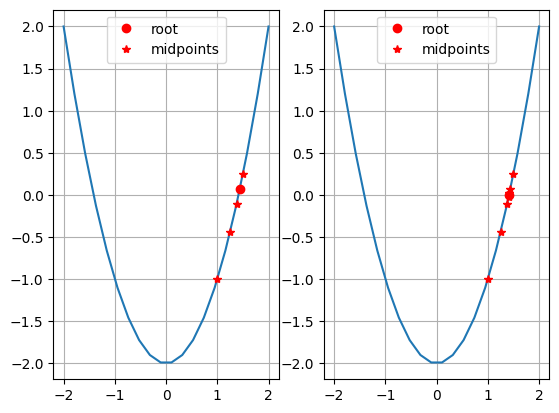

In [41]:
f = lambda x: np.square(x) - 2
x = np.linspace(-2,2,20)

roots_1, midpoints_1 = my_bisection(f, 0, 2, 0.1)
roots_01, midpoints_01 = my_bisection(f, 0, 2, 0.01)


# we can first demonstrate the iterative process of the bisection method
plt.subplot(1, 2, 1)
plt.plot(x, f(x))
plt.plot(roots_1, f(roots_1), 'ro', label='root')
plt.plot(midpoints_1, f(midpoints_1), 'r*', label='midpoints')
plt.grid('on')
plt.legend()

# we can show that with a lower tolerance, there are more iterations that are closer to the true root
plt.subplot(1, 2, 2)
plt.plot(x, f(x))
plt.plot(roots_01, f(roots_01), 'ro', label='root')
plt.plot(midpoints_01, f(midpoints_01), 'r*', label='midpoints')
plt.grid('on')
plt.legend()
plt.show()

In [42]:
# an exception occurs when there is no bounded root
r,m = my_bisection(f, 2, 4, 0.01)

Exception: The scalars a and b do not bound a root

# **19.4 Newton-Raphson Method**


---

The Newton-Raphson method uses Newton's step iteratively to estimate the roots. Using a first order Taylor expansion of a function $f(x)$, we can estimate that $f(x) ≈ f(x_0) + f'(x_0)(x_1-x_0) = 0$, for a root. Rearranging terms, we obtain $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$. This is called a Newton step. The Newton-Raphson makes iterative Newton steps until $f(x_i) \leq t$ for some tolerance $t$. The Newton-Raphson, though approaches a root much more efficiently than the bisector method when there is *a priori* that is close to the root, faces convergence challenges when this guess is inaccurate. One key inaccuracy is poor convergence when $f'(x_i)$ is close to $0$ due to large Newton steps, which can result in finding an unwanted root, closer to the next guess.



In [63]:
# one step of the Newton-Raphson method for a simply quadratic can find the root relatively accurately

import numpy as np

f = lambda x: np.square(x) - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


In [60]:
def my_newton(f, df, x0, tol, n_list=None):
    # output is an estimation of the root of f and list of Newton step points
    # using the Newton Raphson method
    # recursive implementation
    # Initialize m_list only once at the start
    if n_list is None:
        n_list = []
    if abs(f(x0)) < tol:
        return x0, n_list
    else:
      x1 = x0 - f(x0)/df(x0)
      n_list.append(x1)
      return my_newton(f, df, x1, tol, n_list)

estimate = 1.4142137800471977
sqrt(2) = 1.4142135623730951
[1.8333333333333333, 1.4621212121212122, 1.4149984298948028, 1.4142137800471977]


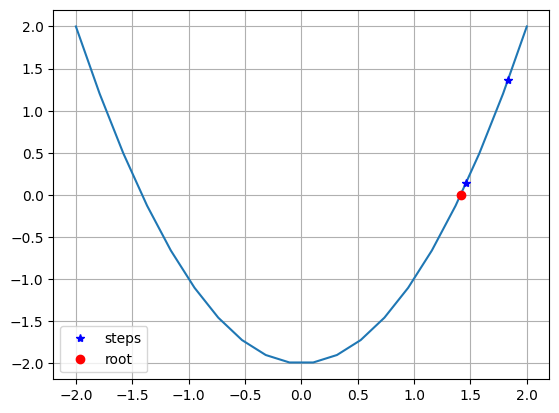

In [77]:
x = np.linspace(-2,2,20)

estimate, steps = my_newton(f, f_prime, 3, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(2))

# we can plot the iterative Newton steps for a simple quadratic
plt.plot(x, f(x))
plt.plot(steps, f(steps), 'b*', label='steps')
plt.plot(estimate, f(estimate), 'ro', label='root')
plt.grid('on')
plt.legend()

estimate = 3.1415926536808043
estimate 2 = -3.141592775357331
pi = 3.141592653589793


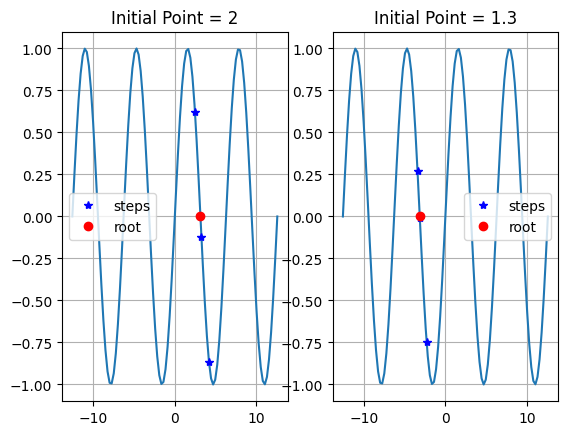

In [95]:
# for a more complicated function, where the root might be poorly estimated
f = lambda x: np.sin(x)
f_prime = lambda x: np.cos(x)

x = np.linspace(-4*np.pi,4*np.pi,100)

estimate, steps = my_newton(f, f_prime, 2, 1e-6)
print("estimate =", estimate)

estimate2, steps2 = my_newton(f, f_prime, 1.3, 1e-6)
print("estimate 2 =", estimate2)

print("pi =", np.pi)

# we can show the first inital point as x_0 = 1.3
plt.subplot(1, 2, 1)
plt.plot(x, f(x))
plt.plot(steps, f(steps), 'b*', label='steps')
plt.plot(estimate, f(estimate), 'ro', label='root')
plt.grid('on')
plt.title('Initial Point = 2')
plt.legend()

# we can show the second inital point as x_0 = 1.5 produces a different root
plt.subplot(1, 2, 2)
plt.plot(x, f(x))
plt.plot(steps2, f(steps2), 'b*', label='steps')
plt.plot(estimate2, f(estimate2), 'ro', label='root')
plt.grid('on')
plt.title('Initial Point = 1.3')
plt.legend()

# **19.5 Root Finding in Python**


---
Python's built-in f_solve from scipy.optimize can solve for roots, given an inital guess and a function.

In [45]:
from scipy.optimize import fsolve

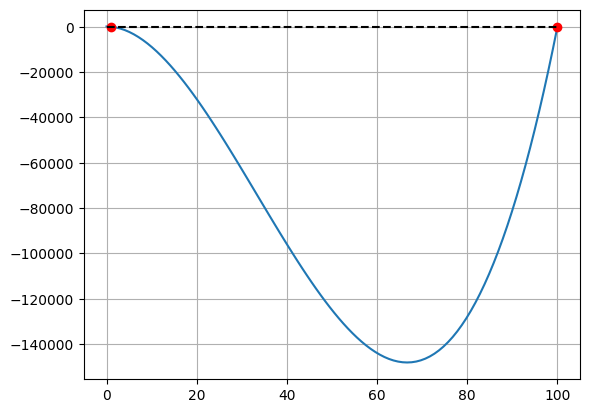

In [53]:
f = lambda x: x**3-100*x**2-x+100+np.sin(x)*np.cos(x)
x = np.linspace(0,100,100)

r = fsolve(f, [2, 80])
plt.plot(x, f(x))
plt.plot(r, f(r), 'ro')
plt.plot(x, np.zeros(len(x)), 'k--')
plt.grid('on')
plt.show()